<a href="https://colab.research.google.com/github/salmanarif86/MLAI/blob/master/Image_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/Sal/cats_and_dogs_filtered.zip

--2019-06-30 21:37:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/Sal/cats_and_dogs_filtered.zip’

/content/Sal/cats_a 100%[===================>]  65.43M   141MB/s    in 0.5s    

2019-06-30 21:37:25 (141 MB/s) - ‘/content/Sal/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
!mkdir Sal

In [0]:
import os
import zipfile
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model


In [0]:
local_dir ='/content/Sal/cats_and_dogs_filtered.zip'
cats_and_dogs = zipfile.ZipFile(local_dir,'r')
cats_and_dogs.extractall('/content/Sal/cats_and_dogs')

In [0]:
training_set_cats = os.listdir('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/train/cats/')
training_set_dogs = os.listdir('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/train/dogs/')

In [0]:
validation_set_cats = os.listdir('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/validation/cats/')
validation_set_dogs = os.listdir('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/')

In [11]:
print(len(training_set_cats))
print(len(training_set_dogs))

print(len(validation_set_cats))
print(len(validation_set_dogs))

1000
1000
500
500


In [43]:
train_cat_names = os.listdir('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/train/cats')
print(train_cat_names[:10])

train_dog_names = os.listdir('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/train/dogs')
print(train_dog_names[:10])

validation_cat_names = os.listdir('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/validation/cats')
print(validation_cat_hames[:10])

validation_dog_names = os.listdir('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/validation/dogs')
print(validation_dog_names[:10])

['cat.886.jpg', 'cat.911.jpg', 'cat.711.jpg', 'cat.457.jpg', 'cat.833.jpg', 'cat.204.jpg', 'cat.922.jpg', 'cat.916.jpg', 'cat.904.jpg', 'cat.528.jpg']
['dog.423.jpg', 'dog.614.jpg', 'dog.28.jpg', 'dog.459.jpg', 'dog.859.jpg', 'dog.23.jpg', 'dog.199.jpg', 'dog.634.jpg', 'dog.694.jpg', 'dog.505.jpg']
['cat.2295.jpg', 'cat.2235.jpg', 'cat.2491.jpg', 'cat.2384.jpg', 'cat.2373.jpg', 'cat.2068.jpg', 'cat.2206.jpg', 'cat.2310.jpg', 'cat.2420.jpg', 'cat.2232.jpg']
['dog.2077.jpg', 'dog.2448.jpg', 'dog.2021.jpg', 'dog.2278.jpg', 'dog.2198.jpg', 'dog.2224.jpg', 'dog.2274.jpg', 'dog.2351.jpg', 'dog.2143.jpg', 'dog.2094.jpg']


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

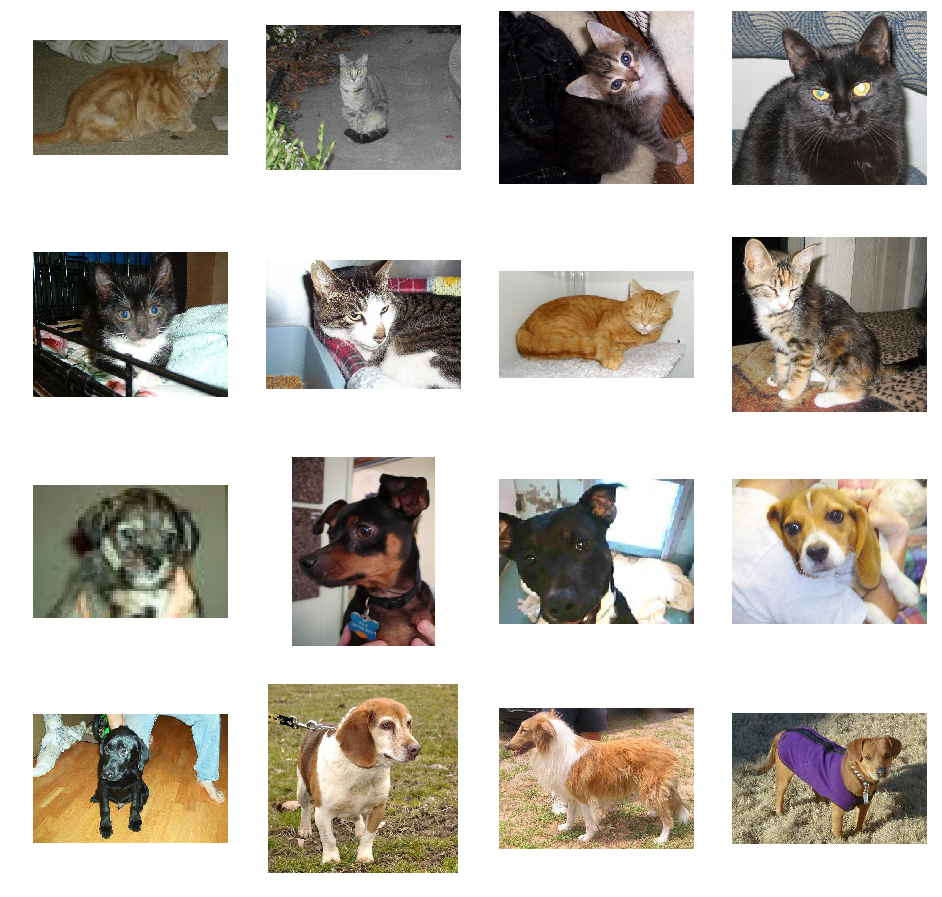

In [44]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/train/cats', fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/train/dogs', fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [12]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) 

W0630 21:37:38.001152 140615762540416 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

W0630 21:37:40.391964 140615762540416 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [16]:
train_data = train_generator.flow_from_directory('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/train',
                                                target_size =(150, 150),
                                                batch_size = 100,
                                                class_mode ='binary')

validation_data = train_generator.flow_from_directory('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/validation',
                                                target_size =(150, 150),
                                                batch_size = 50,
                                                class_mode ='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.98:
      print('\n stop training as we will now be overfitting on training data')
      self.model.stop_training = True

In [0]:
customCall = myCallback()

In [19]:
history = model.fit(train_data, validation_data=validation_data, epochs=100, callbacks=[customCall])

Epoch 1/100
20/20 [==============================] - 110s 6s/step - loss: 0.6915 - acc: 0.5090 - val_loss: 0.6785 - val_acc: 0.6210
Epoch 2/100
20/20 [==============================] - 106s 5s/step - loss: 0.6762 - acc: 0.5790 - val_loss: 0.6603 - val_acc: 0.6400
Epoch 3/100
20/20 [==============================] - 106s 5s/step - loss: 0.6639 - acc: 0.6050 - val_loss: 0.6477 - val_acc: 0.6430
Epoch 4/100
20/20 [==============================] - 106s 5s/step - loss: 0.6434 - acc: 0.6305 - val_loss: 0.6389 - val_acc: 0.6580
Epoch 5/100
20/20 [==============================] - 106s 5s/step - loss: 0.6226 - acc: 0.6560 - val_loss: 0.6112 - val_acc: 0.6810
Epoch 6/100
20/20 [==============================] - 106s 5s/step - loss: 0.6035 - acc: 0.6695 - val_loss: 0.5994 - val_acc: 0.6820
Epoch 7/100
20/20 [==============================] - 107s 5s/step - loss: 0.5734 - acc: 0.7025 - val_loss: 0.5758 - val_acc: 0.7040
Epoch 8/100
20/20 [==============================] - 106s 5s/step - loss: 0.

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving dog.jpg to dog.jpg
[1.]
dog.jpg is a dog


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


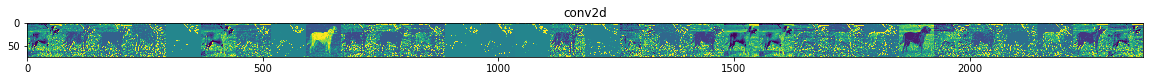

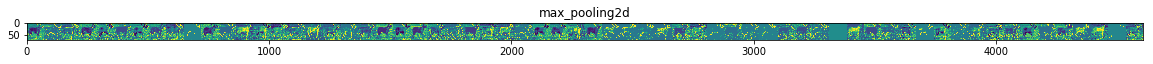

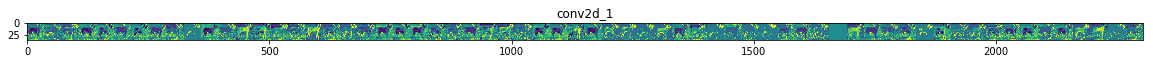

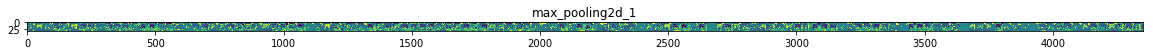

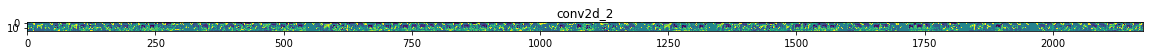

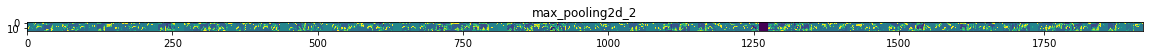

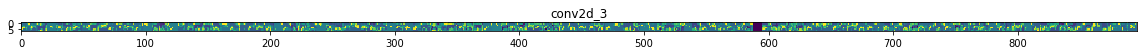

In [46]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
cat_img_files = [os.path.join('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/train/cats', f) for f in train_cat_names]
dog_img_files = [os.path.join('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/train/dogs', f) for f in train_dog_names]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [0]:
import matplotlib.pyplot as plt

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epoch = range(len(acc))

loss = history.history['loss']
val_loss = history.history['val_loss']

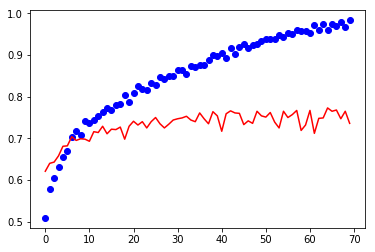

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epoch, acc, 'bo', label ='Training Accuracy')
plt.plot(epoch, val_acc, 'r', label ='Validation Accuracy')
plt.figure()
plt.show()

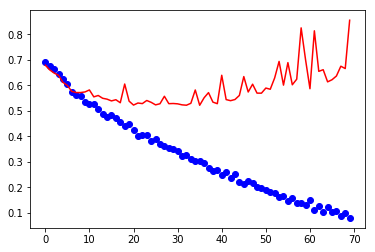

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(epoch, loss, 'bo', label ='Training Accuracy')
plt.plot(epoch, val_loss, 'r', label ='Validation Accuracy')
plt.figure()
plt.show()

In [0]:
train_generator_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                              rotation_range = 40,
                                                                              width_shift_range = 0.2,height_shift_range = 0.2,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [44]:
train_data = train_generator_augmentation.flow_from_directory('/content/Sal/cats_and_dogs/cats_and_dogs_filtered/train',
                                                target_size =(150, 150),
                                                batch_size = 100,
                                                class_mode ='binary')

Found 2000 images belonging to 2 classes.


In [0]:
history = model.fit(train_data,validation_data=validation_data, epochs=100, callbacks=[customCall])

Epoch 1/100
20/20 [==============================] - 116s 6s/step - loss: 0.7342 - acc: 0.6560 - val_loss: 0.5344 - val_acc: 0.7290
Epoch 2/100
20/20 [==============================] - 110s 5s/step - loss: 0.6037 - acc: 0.6830 - val_loss: 0.5111 - val_acc: 0.7460
Epoch 3/100
20/20 [==============================] - 110s 5s/step - loss: 0.5786 - acc: 0.6890 - val_loss: 0.5040 - val_acc: 0.7560
Epoch 4/100
20/20 [==============================] - 110s 5s/step - loss: 0.5869 - acc: 0.6890 - val_loss: 0.5035 - val_acc: 0.7550
Epoch 5/100
20/20 [==============================] - 110s 5s/step - loss: 0.5781 - acc: 0.6990 - val_loss: 0.5025 - val_acc: 0.7530
Epoch 6/100
20/20 [==============================] - 110s 5s/step - loss: 0.5562 - acc: 0.7125 - val_loss: 0.5062 - val_acc: 0.7580
Epoch 7/100
20/20 [==============================] - 110s 6s/step - loss: 0.5617 - acc: 0.7005 - val_loss: 0.5006 - val_acc: 0.7460
Epoch 8/100
20/20 [==============================] - 110s 6s/step - loss: 0.

In [0]:
acc = model.history